In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
path = os.getcwd()
path

'/content'

# Pre-Processing


In [15]:
import pandas as pd  # Powerful data manipulation and analysis library
import numpy as np
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Data

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
prediction_length = 28
data_path = "/content/drive/MyDrive/Colab/advertising.csv"

In [17]:
# Load the dataset
df = pd.read_csv(data_path)
# Display the first few rows of the dataset
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


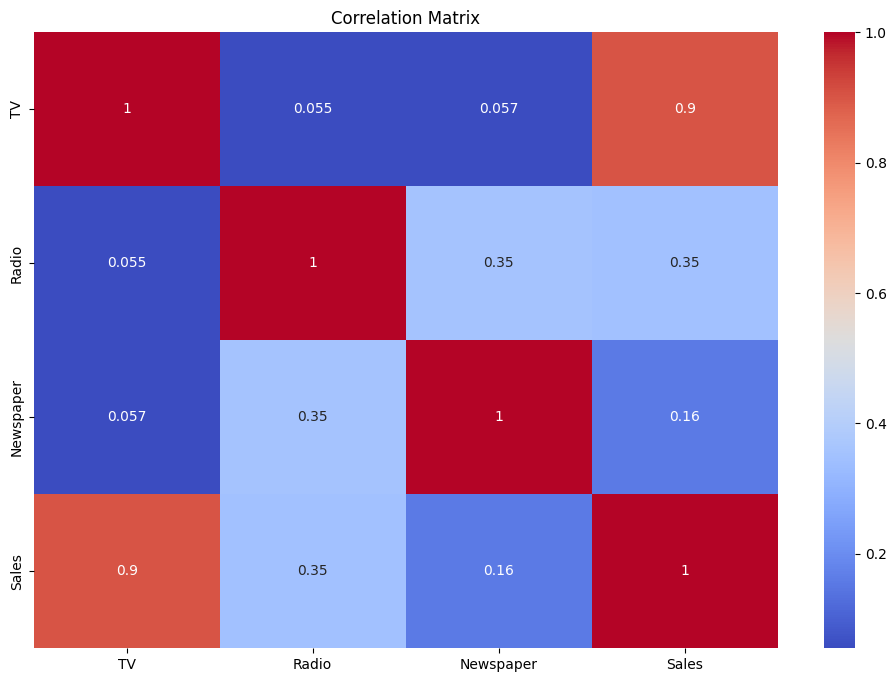

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
x_train = df.drop(['Sales'], axis=1)
y_train = df['Sales']

In [21]:
print(x_train.shape)
print(y_train.shape)

(200, 3)
(200,)


Function to process the data from train models

In [22]:
def process_data(df, prediction_length):
  float_df = df.astype(float)

  x_train = float_df.drop(['Sales'], axis=1)
  y_train = float_df['Sales']

# Data Visualization

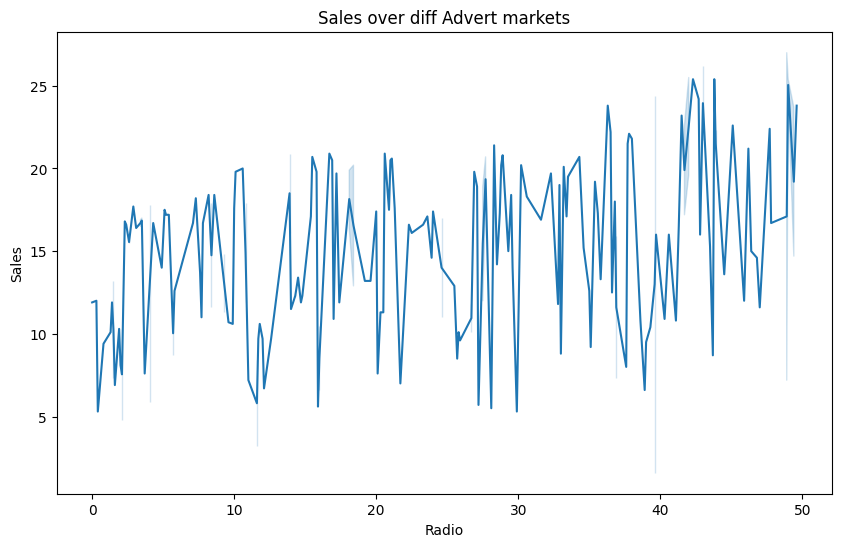

In [23]:
# Plot sales volume for Radio
plt.figure(figsize=(10, 6))
sns.lineplot(x='Radio', y='Sales', data=df)
plt.title('Sales over diff Advert markets')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

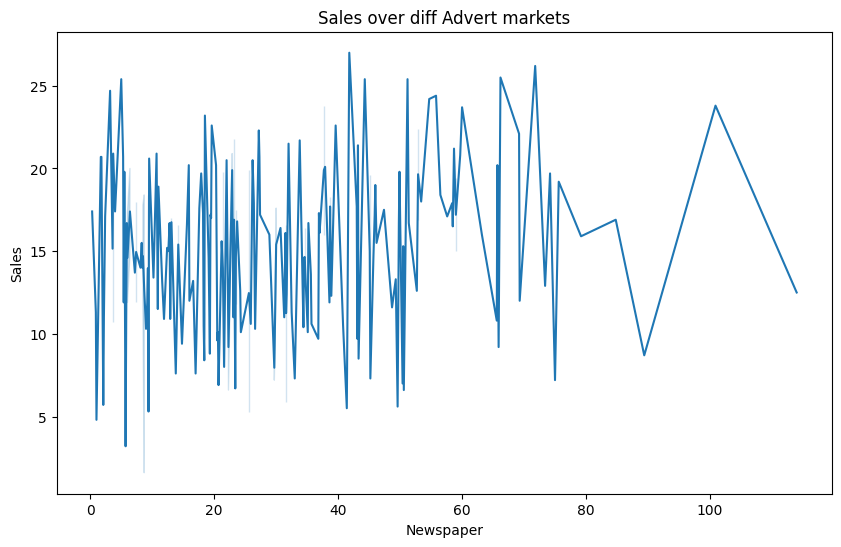

In [24]:
# Plot sales for NewsPaper
plt.figure(figsize=(10, 6))
sns.lineplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales over diff Advert markets')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

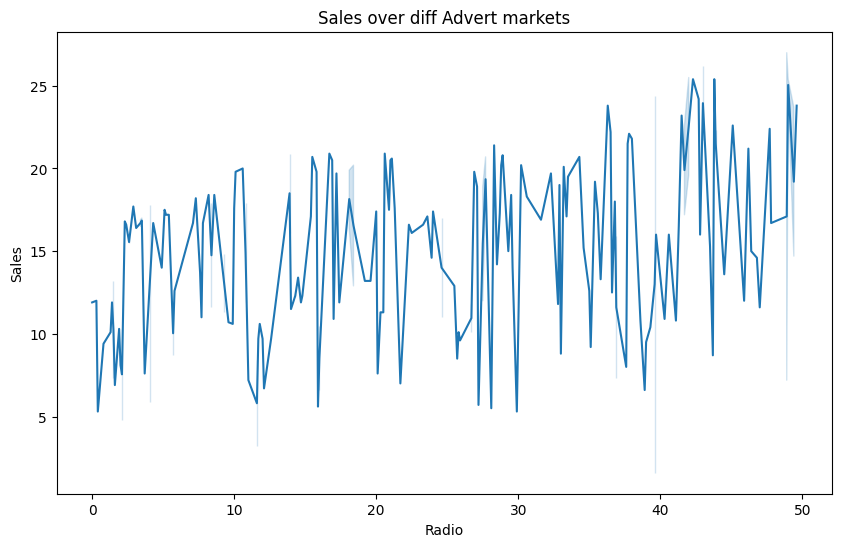

In [25]:
# Plot sales volume for Radio
plt.figure(figsize=(10, 6))
sns.lineplot(x='Radio', y='Sales', data=df)
plt.title('Sales over diff Advert markets')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()



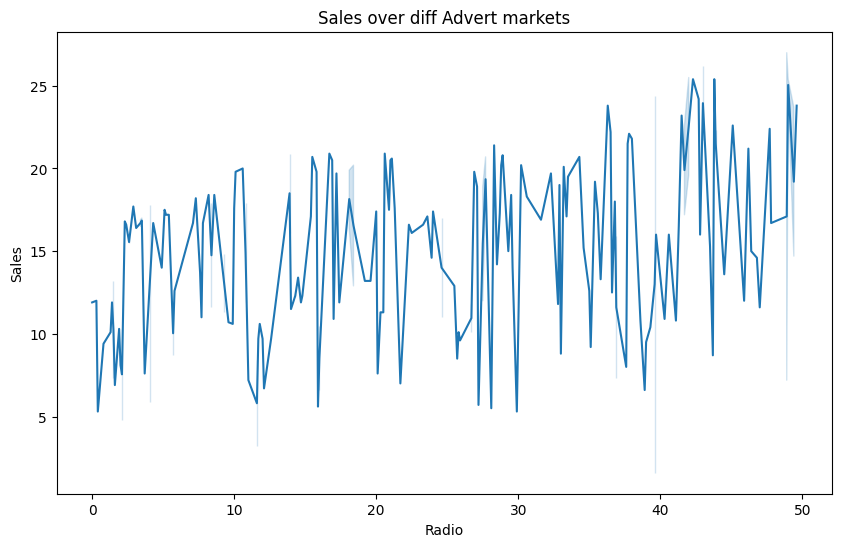

Correlation between Radio and sales volume:
          Radio     Sales
Radio  1.000000  0.349631
Sales  0.349631  1.000000


In [26]:
# Plot sales volume for Radio
plt.figure(figsize=(10, 6))
sns.lineplot(x='Radio', y='Sales', data=df)
plt.title('Sales over diff Advert markets')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

# Correlation between price and sales volume
print("Correlation between Radio and sales volume:")
print(df[['Radio', 'Sales']].corr())

In [27]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Model Architecture

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train, x_train_val, y_train, y_train_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [29]:
from xgboost import XGBRegressor
xg_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
#fitting model
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xg_y_pred = xg_model.predict(x_train_val)

# Use appropriate metrics for regression problems
print("Mean Squared Error:", mean_squared_error(y_train_val, xg_y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train_val, xg_y_pred))
print("R-squared:", r2_score(y_train_val, xg_y_pred))

Mean Squared Error: 1.4569294401531907
Mean Absolute Error: 0.9305719721317292
R-squared: 0.9528518583431272


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.36244272128848
R-squared: 0.7839654517904844
